In [37]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn.apionly as sns

In [87]:
#import CSV
terror = "Terrorism.csv"
df = pd.read_csv(terror, encoding = "Latin")

C:\Users\khyman003\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (61,63,79,114,115) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [145]:
#Pull in columns that we need from the large data set
df2 = df[["iyear","imonth", "country_txt", "region_txt", "city", "attacktype1_txt", 
          "targtype1_txt","success","nkill","nwound"]]

#Rename the columns for better understanding
renamed_df = df2.rename(columns={"iyear": "Year","imonth": "Month", "country_txt": "Country", 
                "region_txt":"Region", "city":"City", "attacktype1_txt": "Attack Type",
                "targtype1_txt":"Target Type","nkill":"Casualties","nwound":"Number Wounded",
                                 "success":"Successful Attack"})

In [146]:
#Clean up the "Attack Type" column responses 
##Combine similar-items and less common items

renamed_df["Attack Type"] = renamed_df["Attack Type"].replace(
    {"Hostage Taking (Barricade Incident)": "Hostage Taking", 
     "Hostage Taking (Kidnapping)": "Hostage Taking",
     "Unarmed Assault": "Armed/Unarmed Assault",
     "Armed Assault":"Armed/Unarmed Assault",
     "Hijacking":"Other/Unknown", 
     "Unknown":"Other/Unknown"})


renamed_df["Year"] = renamed_df["Year"].astype(int)

In [147]:
#Group data by Attack Type, using the count function
attacktypeDF = renamed_df[["Year","Attack Type"]]
attacktypegroup = attacktypeDF.groupby(["Attack Type"]).count()

(-1.1054353713989258,
 1.1002588272094727,
 -1.1042838454246522,
 1.1020222067832948)

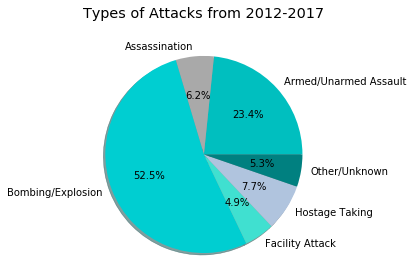

In [153]:
#Plot the pie chart
colors = ["c","darkgrey","darkturquoise","turquoise","lightsteelblue","teal"]
labels = ["Armed/Unarmed Assault", "Assassination", "Bombing/Explosion",
          "Facility Attack","Hostage Taking","Other/Unknown"]
plt.pie(attacktypegroup, colors=colors, labels=labels, shadow=True, autopct="%1.1f%%")

plt.title("Types of Attacks from 2012-2017", y=1.1)
plt.axis("equal")

In [149]:
#Group the full dataframe above by year, and count the total number of records. This will equate to the total
#number of attacks, sucessful or not.

worldwide = renamed_df.groupby(["Year"]).count()
worldwidecount = worldwide[["Country"]]
renamed_worldwidecount = worldwidecount.rename(columns={"Country":"Number of Total Attacks"})

In [193]:
#Filter the full dataframe for successful attacks, and use groupby to count instances by year
WWsuccess = renamed_df.loc[renamed_df["Successful Attack"] == 1, :]
WWsuccessct = WWsuccess.groupby(["Year"]).count()
WWsuccessDF = WWsuccessct[["Successful Attack"]]

#Filter the full dataframe for failed attacks, and use groupby to count instances by year
WWfail = renamed_df.loc[renamed_df["Successful Attack"] == 0, :]
WWfailct = WWfail.groupby(["Year"]).count()
WWfailDF = WWfailct[["Successful Attack"]]
WWfailDF_renamed= WWfailDF.rename(columns={"Successful Attack":"Failed Attack"})

#Combine the dataframes to include successful and failed attacks for ease of plotting
CombinedSuccessFail = pd.merge(WWsuccessDF, WWfailDF_renamed, on="Year")

fail = CombinedSuccessFail["Failed Attack"]
success = CombinedSuccessFail["Successful Attack"]

#CombinedSuccessFail["Percent Failed"] = (fail / ( fail + success))*100
CombinedSuccessFail["Percent Success"] = (success/ (fail + success))*100
CombinedSuccessFail


,Successful Attack,Failed Attack,Percent Success
Year,,,
2012,7600,922,89.180943
2013,10484,1552,87.105351
2014,15015,1888,88.830385
2015,12676,2289,84.704310
2016,10975,2612,80.775742
2017,8652,2248,79.376147


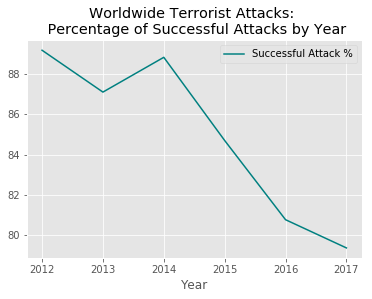

In [202]:
PercentFailChart = CombinedSuccessFail[["Percent Success"]]
PercentFailChart.head()
PercentFail = PercentFailChart.plot(title="Worldwide Terrorist Attacks: \n Percentage of Successful Attacks by Year",color = ["teal"])
plt.legend(["Successful Attack %"])

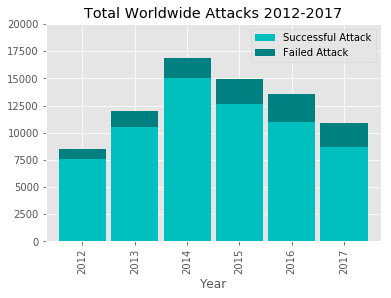

In [85]:
#Plot the stacked bar chart
SuccessFailChart = CombinedSuccessFail.plot(kind="line", stacked=True, 
                                            title="Total Worldwide Attacks 2012-2017",
                                            width=.9, color = ["c","teal"])
plt.ylim((0,20000))
SuccessFailChart

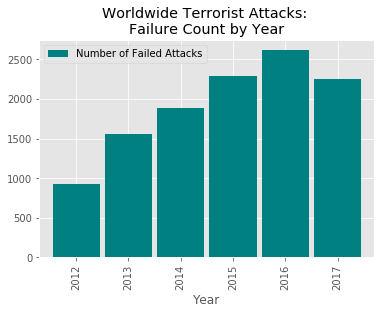

In [203]:
FailChart = WWfailDF_renamed.plot(kind="bar", title="Worldwide Terrorist Attacks: \nFailure Count by Year", 
                                  width=.9, color = ["teal"])
plt.legend(["Number of Failed Attacks"])

Text(0.5,1,'Average Attacks by Month (2012-2017)')

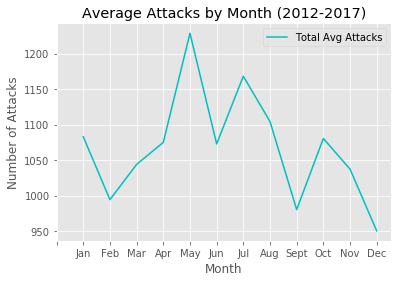

In [111]:
#Plot Seasonality of attacks worldwide, using average attacks by month

monthlyDFcolumns = renamed_df[["Year","Month"]]
monthlyDFcolumns.head()
MonthlyDF = (monthlyDFcolumns.groupby(["Month"]).count()/6)
MonthlyDF.head()


SeasonalityChart = MonthlyDF.plot(color=["c","teal"])
titles = ("","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec")
y_pos = np.arange(len(titles))
plt.xticks(y_pos, titles)
plt.legend(["Total Avg Attacks"])
SeasonalityChart.set_ylabel("Number of Attacks")
SeasonalityChart.set_title("Average Attacks by Month (2012-2017)")

In [150]:
monthlyDFcolumns.head()
szn = renamed_df[["Year","Month","Attack Type"]]
Seasonality = szn.groupby(["Year","Month"]).count()

Text(0.5,1,'Total Attacks by Month (2012-2017)')

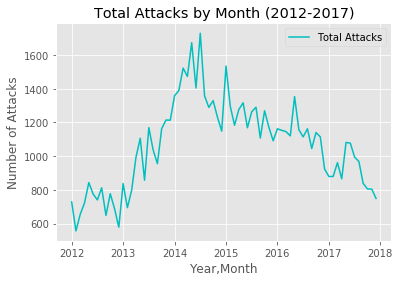

In [156]:
#Plot number of attacks from 2012-2018 by month to show seasonality

sznchart = Seasonality.plot(color=["c","teal"])

x = np.array([0,12,24,36,48,60,72])
titles = ["2012","2013","2014","2015","2016","2017","2018"]
#y_pos = np.arange(len(titles))
plt.xticks(x, titles)
plt.legend(["Total Attacks"])
sznchart.set_ylabel("Number of Attacks")
sznchart.set_title("Total Attacks by Month (2012-2017)")

In [154]:
## Filter the full dataframe above for only successful attacks
WWsuccess2 = renamed_df.loc[renamed_df["Successful Attack"] == 1, :]
WWsuccessct2 = WWsuccess.groupby(["Month"]).count()/6
WWsuccessDF2 = WWsuccessct2[["Successful Attack"]]
WWsuccessDF2_renamed = WWsuccessDF2.rename(columns={"Successful Attack":"Avg Monthly Successful Attacks"})
WWsuccessDF2.head()

#Filter the full dataframe above for only failed attacks
WWfail2 = renamed_df.loc[renamed_df["Successful Attack"] == 0, :]
WWfailct2 = WWfail2.groupby(["Month"]).count()/6
WWfailDF2 = WWfailct2[["Successful Attack"]]
WWfailDF2_renamed = WWfailDF2.rename(columns={"Successful Attack":"Avg Monthly Failed Attacks"})
WWfailDF2_renamed.head()

#Combine month by month failure and success data, and add in a column to show average % failed

failed = WWfailDF2_renamed["Avg Monthly Failed Attacks"]
successful = WWsuccessDF2_renamed["Avg Monthly Successful Attacks"]
combinedmonth["% Failed of Total Attempted"] = failed /(failed + successful)*100
combinedmonth = combinedmonth.astype(float)


Text(0.5,1,'% of Failed Attacks by Month (Average from 2012-2017)')

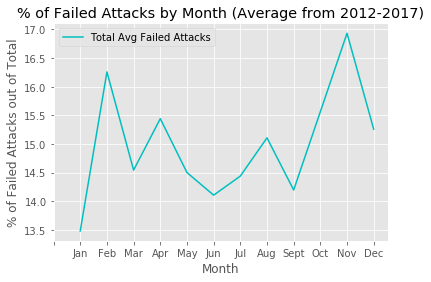

In [157]:
#Plot % of average failed attacks by month

FailurePercentageDF = combinedmonth["% Failed of Total Attempted"]
FailedSeasonality = FailurePercentageDF.plot(color=["c","teal"])
titles = ("","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec")
y_pos = np.arange(len(titles))
plt.xticks(y_pos, titles)
plt.legend(["Total Avg Failed Attacks"])
FailedSeasonality.set_ylabel("% of Failed Attacks out of Total")
FailedSeasonality.set_title("% of Failed Attacks by Month (Average from 2012-2017)")

Text(0.5,1,'Average Failed Attacks by Month (2012-2017)')

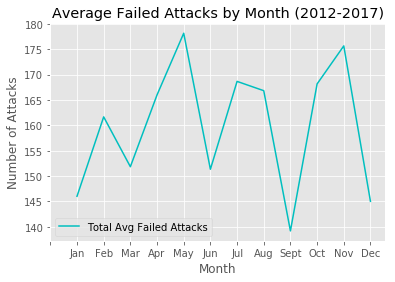

In [48]:
FailedSeasonality = WWfailDF2_renamed.plot(color=["c","teal"])
titles = ("","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec")
y_pos = np.arange(len(titles))
plt.xticks(y_pos, titles)
plt.legend(["Total Avg Failed Attacks"])
FailedSeasonality.set_ylabel("Number of Attacks")
FailedSeasonality.set_title("Average Failed Attacks by Month (2012-2017)")